In [1]:
# all relevant libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
path1 = "../Data/features_30_sec.csv"
dataset = pd.read_csv(path1)

In [3]:
header_row = dataset.columns.tolist()
print(header_row)

['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'label']


In [4]:
columns = ['filename','label']
features = dataset.drop(columns=columns, axis=1)  # Drop the 'label' column
labels = dataset['label']

In [5]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [6]:
from sklearn.linear_model import LogisticRegression

# Create the logistic regression model with L1 regularization
model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

/usr/local/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [7]:
# Get the non-zero coefficients and corresponding feature names
non_zero_coefficients = model.coef_[0]
feature_names = features.columns

# Create a dictionary to store the feature contributions
feature_contributions = {}

# Iterate over the non-zero coefficients and feature names
for feature, coefficient in zip(feature_names, non_zero_coefficients):
    feature_contributions[feature] = coefficient

# Print the feature contributions in descending order
sorted_contributions = sorted(feature_contributions.items(), key=lambda x: abs(x[1]), reverse=True)
for feature, contribution in sorted_contributions:
    print(f"Feature: {feature}, Contribution: {contribution}")

Feature: mfcc12_mean, Contribution: -0.36715683620681777
Feature: mfcc18_mean, Contribution: -0.2141664625715712
Feature: mfcc2_mean, Contribution: -0.19751351801596886
Feature: mfcc17_mean, Contribution: -0.18080530852083063
Feature: mfcc7_mean, Contribution: -0.16435818963582466
Feature: mfcc6_mean, Contribution: 0.1625240983609521
Feature: mfcc3_mean, Contribution: 0.14337345750056538
Feature: mfcc10_mean, Contribution: 0.11192378083277803
Feature: mfcc20_mean, Contribution: 0.09039520254732052
Feature: mfcc9_mean, Contribution: -0.08825611166077979
Feature: mfcc15_mean, Contribution: 0.048193206434155623
Feature: mfcc16_mean, Contribution: 0.047742873404550745
Feature: mfcc14_mean, Contribution: -0.04652057049749358
Feature: mfcc1_mean, Contribution: 0.04515023286400037
Feature: mfcc5_mean, Contribution: -0.04451202389723433
Feature: mfcc8_mean, Contribution: 0.03527621351724165
Feature: mfcc13_var, Contribution: -0.025508950129399362
Feature: mfcc18_var, Contribution: 0.0243499295

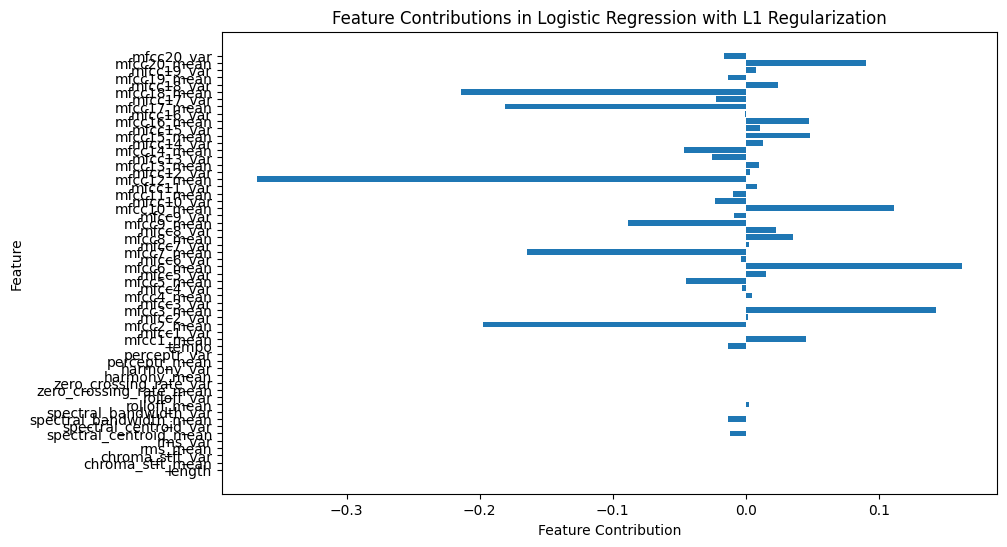

In [8]:
import matplotlib.pyplot as plt

# Get the feature names and contributions
feature_names = list(feature_contributions.keys())
contributions = list(feature_contributions.values())

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(contributions)), contributions, align='center')
plt.yticks(range(len(contributions)), feature_names)
plt.xlabel('Feature Contribution')
plt.ylabel('Feature')
plt.title('Feature Contributions in Logistic Regression with L1 Regularization')
plt.show()

In [9]:
negative_contributions = {feature: contribution for feature, contribution in feature_contributions.items() if contribution < 0}

In [11]:
negative_contributions

AttributeError: 'dict' object has no attribute 'shape'

In [12]:
features_with_positive_contributions = features.drop(negative_contributions.keys(), axis=1)

In [13]:
features_with_positive_contributions

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,rolloff_mean,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,...,mfcc11_var,mfcc12_var,mfcc13_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc18_var,mfcc19_var,mfcc20_mean
0,661794,0.350088,0.088757,0.130228,0.002827,3805.839606,0.083045,0.000767,-4.529724e-05,0.008172,...,61.773094,51.244125,-3.672300,40.554478,-5.162882,49.775421,0.752740,41.597103,55.062923,1.221291
1,661794,0.340914,0.094980,0.095948,0.002373,3550.522098,0.056040,0.001448,1.395807e-04,0.005099,...,105.173630,96.197212,-2.231760,73.152534,-6.012148,52.422142,0.927998,48.120598,51.106190,0.531217
2,661794,0.363637,0.085275,0.175570,0.002746,3042.260232,0.076291,0.001007,2.105576e-06,0.016342,...,57.781425,64.480209,-8.907628,57.711136,-9.229274,36.580986,2.451690,52.382141,46.639660,-2.231258
3,661794,0.404785,0.093999,0.141093,0.006346,2184.745799,0.033309,0.000423,4.583644e-07,0.019054,...,110.236687,48.251999,-2.480174,62.289902,-2.870789,51.651592,0.780874,37.319130,37.259739,-3.407448
4,661794,0.308526,0.087841,0.091529,0.002303,3579.757627,0.101461,0.001954,-1.756129e-05,0.004814,...,80.254066,86.430626,-6.933385,70.943336,-9.164666,75.793404,-4.520576,53.613918,62.910812,-11.703234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,661794,0.352063,0.080487,0.079486,0.000345,4253.557033,0.089227,0.001305,1.926835e-06,0.004594,...,42.666080,43.414345,-12.297895,56.457893,-10.273881,36.433578,1.789867,36.778877,54.866825,-1.193787
996,661794,0.398687,0.075086,0.076458,0.000588,4149.338328,0.097664,0.000868,-1.406142e-06,0.003981,...,44.253551,38.195637,-16.392994,29.224157,-4.364872,43.484493,3.739020,32.010040,39.196327,-2.795338
997,661794,0.432142,0.075268,0.081651,0.000322,4031.405321,0.121823,0.001697,-4.881450e-07,0.003825,...,43.337452,42.966385,-17.947060,37.248077,-11.519417,39.505585,1.838090,36.001110,42.502201,-2.106337
998,661794,0.362485,0.091506,0.083860,0.001211,3015.631004,0.048724,0.000808,7.986756e-07,0.006077,...,63.858929,75.528023,-10.070732,42.620800,-5.275370,46.763134,-2.812176,34.331261,47.227180,-3.590644


In [14]:
features = features_with_positive_contributions

In [15]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the features
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.fit_transform(X_test)

In [20]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train_normalized, y_train)

GaussianNB()

In [21]:
from sklearn.metrics import classification_report

# Get the predictions on the test set
test_predictions = nb_classifier.predict(X_test_normalized)

# Generate the classification report
classification_rep = classification_report(y_test, test_predictions)

# Print the classification report
print(classification_rep)

              precision    recall  f1-score   support

       blues       0.00      0.00      0.00        20
   classical       0.57      0.31      0.40        13
     country       0.00      0.00      0.00        27
       disco       0.20      0.29      0.24        21
      hiphop       0.12      0.67      0.20        15
        jazz       0.40      0.77      0.52        22
       metal       1.00      0.08      0.15        25
         pop       0.00      0.00      0.00        13
      reggae       0.41      0.48      0.44        23
        rock       0.60      0.14      0.23        21

    accuracy                           0.27       200
   macro avg       0.33      0.27      0.22       200
weighted avg       0.35      0.27      0.22       200



/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Define the parameter grid
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

# Create the Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform grid search with cross-validation
grid_search = GridSearchCV(nb_classifier, param_grid, cv=5)
grid_search.fit(X_train_normalized, y_train)

# Get the best model and its hyperparameters
best_classifier = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set using the best model
test_predictions = best_classifier.predict(X_test_normalized)

# Generate the classification report
classification_rep = classification_report(y_test, test_predictions)

# Print the best hyperparameters and the classification report
print("Best Hyperparameters:", best_params)
print(classification_rep)

Best Hyperparameters: {'var_smoothing': 1e-07}
              precision    recall  f1-score   support

       blues       0.00      0.00      0.00        20
   classical       0.57      0.31      0.40        13
     country       0.00      0.00      0.00        27
       disco       0.20      0.29      0.24        21
      hiphop       0.12      0.67      0.20        15
        jazz       0.40      0.77      0.52        22
       metal       1.00      0.08      0.15        25
         pop       0.00      0.00      0.00        13
      reggae       0.41      0.48      0.44        23
        rock       0.60      0.14      0.23        21

    accuracy                           0.27       200
   macro avg       0.33      0.27      0.22       200
weighted avg       0.35      0.27      0.22       200



/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
import joblib
# Save the trained classifier to a file
joblib.dump(best_classifier, 'nbc_model1.h5')

['nbc_model1.h5']